# Spoton Data Exploration
This notebook serves as a playground for the following tasks:

* Get an understanding of the data at hand
* Create visualizations
* Do analysis and feature engineering
* Develop ready to use pipeline

In [92]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

## Loading of the extracted data and initial assessment

In [2]:
data_folder = 'data'

# get the file handles
trackinfo = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f)) and 'trackinfo' in f][0]
trackfeatures = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f)) and 'trackfeatures' in f][0]

pd_trackinfo = pd.read_pickle(trackinfo)
pd_trackfeatures = pd.read_pickle(trackfeatures)

#### Trackinfo

In [3]:
pd_trackinfo.head()

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,243839,False,{'isrc': 'USWB11701603'},{'spotify': 'https://open.spotify.com/track/01...,https://api.spotify.com/v1/tracks/01FwoJVHy55B...,01FwoJVHy55BqEzf9hTtyf,False,Darker Than The Light That Never Bleeds - Ches...,0,None,1,track,spotify:track:01FwoJVHy55BqEzf9hTtyf
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,[],1,259764,False,{'isrc': 'CA6D21700236'},{'spotify': 'https://open.spotify.com/track/0L...,https://api.spotify.com/v1/tracks/0LTq2r4sWXgr...,0LTq2r4sWXgrlJk5gfjanc,False,By Your Side (feat. Emel),24,None,1,track,spotify:track:0LTq2r4sWXgrlJk5gfjanc
2,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,160312,False,{'isrc': 'NLQ8D1700559'},{'spotify': 'https://open.spotify.com/track/0d...,https://api.spotify.com/v1/tracks/0d04hp9JU5pk...,0d04hp9JU5pkMoSFotxkmY,False,Alone Tonight,27,https://p.scdn.co/mp3-preview/b98fee9a97f3d755...,1,track,spotify:track:0d04hp9JU5pkMoSFotxkmY
3,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,215629,False,{'isrc': 'CA5KR1558775'},{'spotify': 'https://open.spotify.com/track/14...,https://api.spotify.com/v1/tracks/144Jdqnukv2z...,144Jdqnukv2zebyt6vq9H8,False,Crash The Party,32,https://p.scdn.co/mp3-preview/c07475ee9c86f9cd...,1,track,spotify:track:144Jdqnukv2zebyt6vq9H8
4,"{'album_type': 'compilation', 'artists': [{'ex...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,224000,False,{'isrc': 'NLF711508382'},{'spotify': 'https://open.spotify.com/track/1L...,https://api.spotify.com/v1/tracks/1LWM8ybNxkIW...,1LWM8ybNxkIWf8QqEafcP1,False,Black Coffee,22,https://p.scdn.co/mp3-preview/fa1abf7821f5cc16...,14,track,spotify:track:1LWM8ybNxkIWf8QqEafcP1


In [4]:
pd_trackinfo.shape

(951, 17)

There are not many features helpful for our purpose. Most of them I will drop without further comments. Some of the features are notheworthy:

* available_markets - One could further improve our model by introducing the markets on which a track is being offered. This could further define a users taste.
* explicit - An easy to understand flag. Tells a lot about the music. Example: Mozart might not fit well in a playlist with Eminem.
* popularity - An interesting attribute. Might be useful.
* duration_ms - Can be dropped as it is also available in trackfeatures

In [5]:
columns_to_drop = ['album', 'artists', 'available_markets', 'disc_number', 
                   'duration_ms', 'external_ids', 'external_urls', 'href',
                   'is_local', 'name', 'preview_url', 'track_number', 'type',
                   'uri']
pd_trackinfo.drop(columns_to_drop, axis=1, inplace=True)

Let's check for duplicate records.

In [6]:
print(pd_trackinfo.shape, pd_trackinfo[pd_trackinfo.duplicated()].shape)

(951, 3) (6, 3)


In [7]:
pd_trackinfo.drop_duplicates(inplace=False)

,explicit,id,popularity
0,False,01FwoJVHy55BqEzf9hTtyf,0
1,False,0LTq2r4sWXgrlJk5gfjanc,24
2,False,0d04hp9JU5pkMoSFotxkmY,27
3,False,144Jdqnukv2zebyt6vq9H8,32
4,False,1LWM8ybNxkIWf8QqEafcP1,22
5,False,4weZBTWBtfQQRUJKVMZOsE,32
6,False,1swtjhwXhJlYtuzqXKfQoD,40
7,False,1uSAGG6FRvrjI22HyGDayU,38
8,False,2UkRIWOvxCYVpyqNTwy9dE,37
9,False,303QJcPey7DrwoIQzHAEjm,29


#### Trackfeatures

In [8]:
pd_trackfeatures.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.011500,https://api.spotify.com/v1/audio-analysis/01Fw...,0.684,243840,0.918,01FwoJVHy55BqEzf9hTtyf,0.133000,5,0.1310,-3.389,1,0.0463,124.959,4,https://api.spotify.com/v1/tracks/01FwoJVHy55B...,audio_features,spotify:track:01FwoJVHy55BqEzf9hTtyf,0.160
1,0.007800,https://api.spotify.com/v1/audio-analysis/0LTq...,0.448,259765,0.880,0LTq2r4sWXgrlJk5gfjanc,0.000011,8,0.0955,-3.076,1,0.1360,170.047,4,https://api.spotify.com/v1/tracks/0LTq2r4sWXgr...,audio_features,spotify:track:0LTq2r4sWXgrlJk5gfjanc,0.394
2,0.013800,https://api.spotify.com/v1/audio-analysis/0d04...,0.585,160312,0.933,0d04hp9JU5pkMoSFotxkmY,0.013200,6,0.2000,-3.927,0,0.0738,127.996,4,https://api.spotify.com/v1/tracks/0d04hp9JU5pk...,audio_features,spotify:track:0d04hp9JU5pkMoSFotxkmY,0.262
3,0.001370,https://api.spotify.com/v1/audio-analysis/144J...,0.626,215630,0.856,144Jdqnukv2zebyt6vq9H8,0.533000,8,0.1610,-4.937,1,0.0565,127.989,4,https://api.spotify.com/v1/tracks/144Jdqnukv2z...,audio_features,spotify:track:144Jdqnukv2zebyt6vq9H8,0.333
4,0.000319,https://api.spotify.com/v1/audio-analysis/1LWM...,0.503,224000,0.969,1LWM8ybNxkIWf8QqEafcP1,0.584000,9,0.3620,-5.737,1,0.0405,139.981,4,https://api.spotify.com/v1/tracks/1LWM8ybNxkIW...,audio_features,spotify:track:1LWM8ybNxkIWf8QqEafcP1,0.288


In [9]:
pd_trackfeatures.shape

(951, 18)

Compared to trackinfo, we do have a lot of useful columns in the trackfeatures. There are some obvious ones, which are completely useless for our cause. Hence, we will just drop them.

In [10]:
columns_to_drop = ['analysis_url', 'track_href', 'type', 'uri']
pd_trackfeatures.drop(columns_to_drop, axis=1, inplace=True)

Let's check for duplicate records too.

In [11]:
print(pd_trackfeatures.shape, pd_trackfeatures[pd_trackfeatures.duplicated()].shape)

(951, 14) (6, 14)


In [12]:
pd_trackfeatures.drop_duplicates(inplace=False)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.011500,0.684,243840,0.918,01FwoJVHy55BqEzf9hTtyf,0.133000,5,0.1310,-3.389,1,0.0463,124.959,4,0.1600
1,0.007800,0.448,259765,0.880,0LTq2r4sWXgrlJk5gfjanc,0.000011,8,0.0955,-3.076,1,0.1360,170.047,4,0.3940
2,0.013800,0.585,160312,0.933,0d04hp9JU5pkMoSFotxkmY,0.013200,6,0.2000,-3.927,0,0.0738,127.996,4,0.2620
3,0.001370,0.626,215630,0.856,144Jdqnukv2zebyt6vq9H8,0.533000,8,0.1610,-4.937,1,0.0565,127.989,4,0.3330
4,0.000319,0.503,224000,0.969,1LWM8ybNxkIWf8QqEafcP1,0.584000,9,0.3620,-5.737,1,0.0405,139.981,4,0.2880
5,0.220000,0.534,206757,0.920,4weZBTWBtfQQRUJKVMZOsE,0.000000,0,0.1860,-2.555,1,0.0673,154.673,4,0.4410
6,0.019800,0.362,253492,0.926,1swtjhwXhJlYtuzqXKfQoD,0.069700,2,0.1060,-4.175,1,0.1090,127.933,4,0.1400
7,0.032800,0.519,278710,0.629,1uSAGG6FRvrjI22HyGDayU,0.000841,0,0.1070,-5.745,0,0.0578,123.986,4,0.1020
8,0.001310,0.311,188618,0.820,2UkRIWOvxCYVpyqNTwy9dE,0.032300,0,0.4330,-8.751,0,0.0683,150.442,4,0.1300
9,0.035300,0.563,163304,0.871,303QJcPey7DrwoIQzHAEjm,0.775000,6,0.1350,-5.266,0,0.0584,149.939,4,0.5060


In [13]:
pd_trackinfo.dtypes

explicit        bool
id            object
popularity     int64
dtype: object

In [14]:
pd_trackfeatures.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

The features and their datatypes look now cleaned up.

In [15]:
df = pd.merge(pd_trackinfo, pd_trackfeatures, on='id', suffixes=('_trackinfo','_trackfeatures'), how='inner')

In [16]:
df.head()

,explicit,id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,False,01FwoJVHy55BqEzf9hTtyf,0,0.011500,0.684,243840,0.918,0.133000,5,0.1310,-3.389,1,0.0463,124.959,4,0.160
1,False,0LTq2r4sWXgrlJk5gfjanc,24,0.007800,0.448,259765,0.880,0.000011,8,0.0955,-3.076,1,0.1360,170.047,4,0.394
2,False,0d04hp9JU5pkMoSFotxkmY,27,0.013800,0.585,160312,0.933,0.013200,6,0.2000,-3.927,0,0.0738,127.996,4,0.262
3,False,144Jdqnukv2zebyt6vq9H8,32,0.001370,0.626,215630,0.856,0.533000,8,0.1610,-4.937,1,0.0565,127.989,4,0.333
4,False,1LWM8ybNxkIWf8QqEafcP1,22,0.000319,0.503,224000,0.969,0.584000,9,0.3620,-5.737,1,0.0405,139.981,4,0.288


In [17]:
df.shape

(963, 16)

Oddly enough our shape is now wrong. Let's find the duplicates.

In [18]:
df[df.duplicated()].shape

(18, 16)

In [19]:
df.drop_duplicates(inplace=True)

Now that we have our dataframe, we can start with normalization.

## Cleanup & Normalization
Details can be found here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Let's see how the features currently correlate.

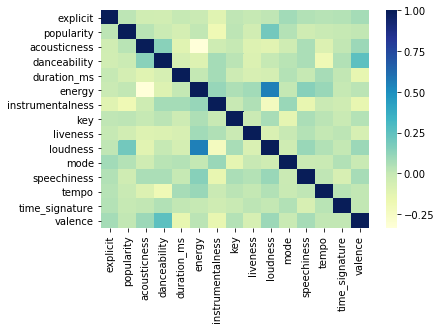

In [20]:
sns.heatmap(df.corr(),cmap="YlGnBu")

Luckily the features do not strongly correlate. Loudness and Energy do seem to correlate a little but we can deal with this.

### Feature 'explicit'

In [61]:
# explicit is boolean so it is by definition already an integer subclass. To avoid confusion, we will make explicit.
df['explicit_clean'] = df['explicit'].astype(float)

### Feature 'popularity'

In [22]:
df['popularity'].unique()

array([ 0, 24, 27, 32, 22, 40, 38, 37, 29, 34, 15, 42, 23, 25, 45, 39, 30,
       21, 51, 28, 41, 47, 11, 17, 35, 43, 48, 57, 31, 26, 44, 49, 14, 36,
       50, 13, 55, 61,  1, 60, 19,  4, 20, 18, 33, 10, 46, 54, 16,  5, 52,
        9,  3, 53, 56, 63, 58, 65,  7,  6, 59, 64,  8, 67, 66, 62, 12, 69],
      dtype=int64)

The spotify documentation tells the following:

> The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
> Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

This means we should normalize this value on a 0 to 1 scale.

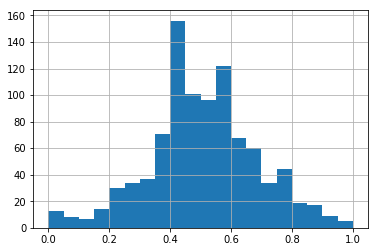

In [23]:
df['popularity_'] = df['popularity'].map(lambda x: x/100)
df['popularity_clean'] = (df['popularity_']-df['popularity_'].min())/(df['popularity_'].max()-df['popularity_'].min())
df.drop(['popularity_'], axis=1, inplace=True)
df['popularity_clean'].hist(bins=20)

### Feature 'acousticness'

According to the documentation:
> 	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

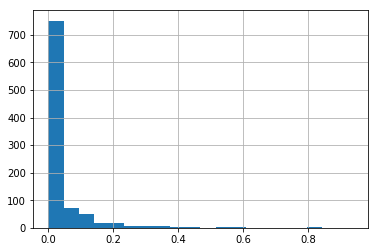

In [24]:
df['acousticness'].hist(bins=20)

The data is highly skewed. Let's use log transformation to normalize.

In [25]:
df['acousticness_'] = df['acousticness'].map(lambda x: np.log(x))
df['acousticness_clean'] = (df['acousticness_']-df['acousticness_'].min())/(df['acousticness_'].max()-df['acousticness_'].min())
df.drop(['acousticness_'], axis=1, inplace=True)

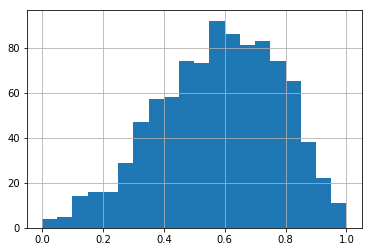

In [26]:
df['acousticness_clean'].hist(bins=20)

### Feature 'danceability'

According to the documentation:
> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

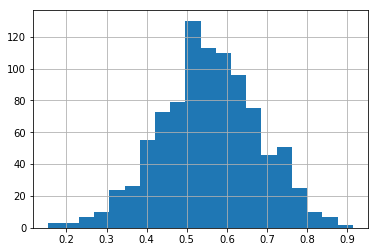

In [27]:
df['danceability'].hist(bins=20)

This feature looks good. No need to work on this one. We will just normalize it.

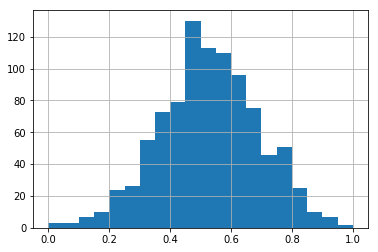

In [28]:
df['danceability_clean'] = (df['danceability']-df['danceability'].min())/(df['danceability'].max()-df['danceability'].min())
df['danceability_clean'].hist(bins=20)

### Feature 'duration_ms'

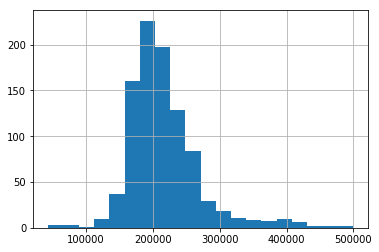

In [29]:
df['duration_ms'].hist(bins=20)

The data is a little skewed. Since this feature represents the track duration, we will allow it to pull the fit line (or in our case principal component) closer, since we are fine with tracks around the 200000ms mark.

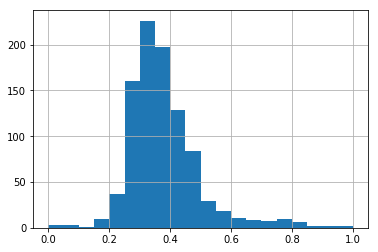

In [30]:
df['duration_ms_clean'] = (df['duration_ms']-df['duration_ms'].min())/(df['duration_ms'].max()-df['duration_ms'].min())
df['duration_ms_clean'].hist(bins=20)

### Feature 'energy'

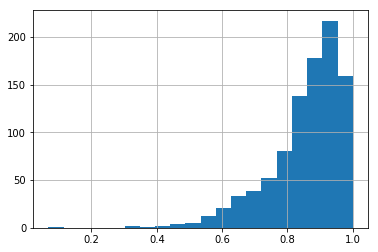

In [31]:
df['energy'].hist(bins=20)

A lot of the tracks seem to be energetic. I think I am fine with leaving this feature skewed.

> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

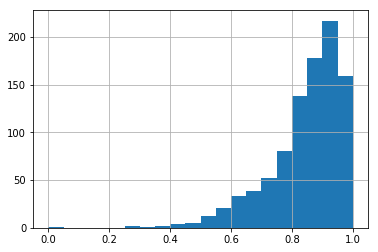

In [32]:
df['energy_clean'] = (df['energy']-df['energy'].min())/(df['energy'].max()-df['energy'].min())
df['energy_clean'].hist(bins=20)

### Feature 'instrumentalness'

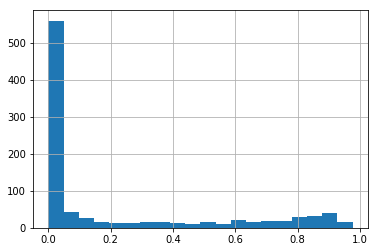

In [33]:
df['instrumentalness'].hist(bins=20)

So this data appears to be skewed as well. 

> 	Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Knowing this, I would propose to scale everything above 0.5 to 0.5 and then rescale from 0 to 1. This will promote non-vocal and vocal tracks "equally".

In [34]:
df['instrumentalness_'] = df['instrumentalness'].map(lambda x: 0.5 if x > 0.5 else x)
df['instrumentalness_clean'] = (df['instrumentalness_']-df['instrumentalness_'].min())/(df['instrumentalness_'].max()-df['instrumentalness_'].min())
df.drop(['instrumentalness_'], axis=1, inplace=True)

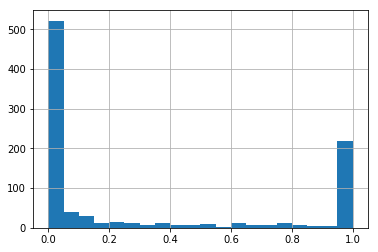

In [35]:
df['instrumentalness_clean'].hist(bins=20)

### Feature 'key'

> 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Therefore, we can map it to a more human readable format.

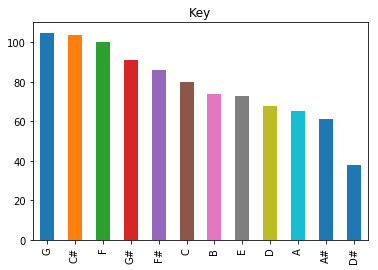

In [36]:
tonal = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
df['key'].map(lambda i: tonal[int(i)]).value_counts().plot.bar(title='Key')

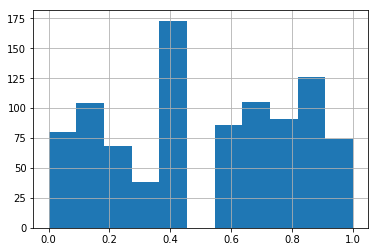

In [37]:
df['key_clean'] = (df['key']-df['key'].min())/(df['key'].max()-df['key'].min())
df['key_clean'].hist(bins=11)

### Feature 'liveness'

> 	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

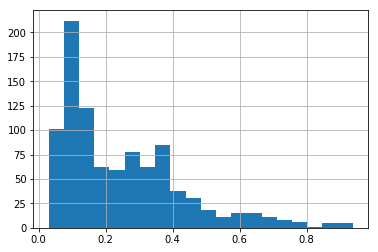

In [38]:
df['liveness'].hist(bins=20)

It looks like 'live' tracks are not really present in the playlist. Neither should they. Hence, we will not fiddle with this representation and let it be as is.

In [39]:
df['liveness_clean'] = (df['liveness']-df['liveness'].min())/(df['liveness'].max()-df['liveness'].min())

### Feature 'loudness'

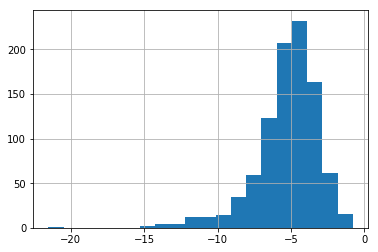

In [40]:
df['loudness'].hist(bins=20)

> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

This is another value that should be left as is. We will normalize it though.

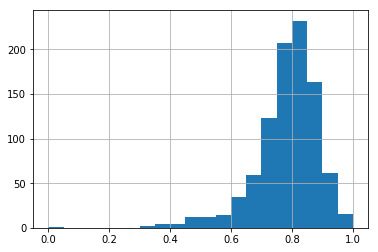

In [41]:
df['loudness_clean'] = (df['loudness']-df['loudness'].min())/(df['loudness'].max()-df['loudness'].min())
df['loudness_clean'].hist(bins=20)

### Feature 'mode'

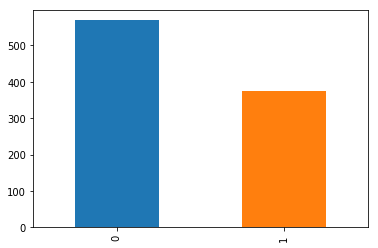

In [42]:
df['mode'].value_counts().plot.bar()

> Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

It looks like this feature does not have much influence as it is almost equally distributed. We will drop it.

In [43]:
df.drop(['mode'], axis=1, inplace=True)

### Feature 'speechiness'

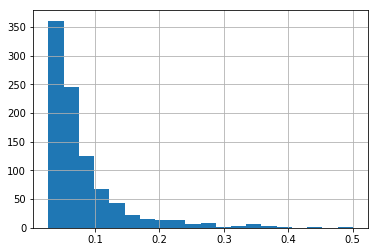

In [44]:
df['speechiness'].hist(bins=20)

> 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

This feature should be treated as 'acousticness'.

In [45]:
df['speechiness_'] = df['speechiness'].map(lambda x: np.log(x))
df['speechiness_clean'] = (df['speechiness_']-df['speechiness_'].min())/(df['speechiness_'].max()-df['speechiness_'].min())
df.drop(['speechiness_'], axis=1, inplace=True)

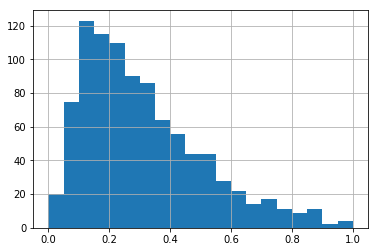

In [46]:
df['speechiness_clean'].hist(bins=20)

### Feature 'tempo'

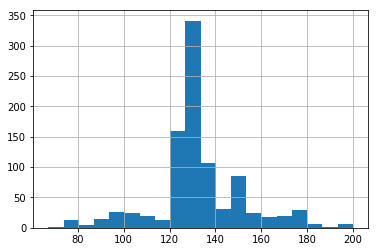

In [47]:
df['tempo'].hist(bins=20)

> 	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

This feature seems fine and kind of expected. Simple normalization will do.

In [48]:
df['tempo_clean'] = (df['tempo']-df['tempo'].min())/(df['tempo'].max()-df['tempo'].min())

### Feature 'time_signature'

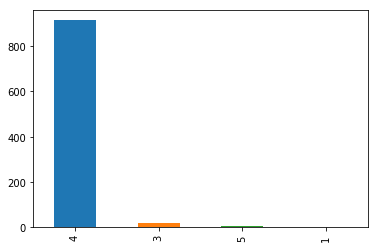

In [49]:
df['time_signature'].value_counts().plot.bar()

> An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

Similar to 'mode', this feature is not really helpful. We will drop it too.

In [50]:
df.drop(['time_signature'], axis=1, inplace=True)

### Feature 'valence'

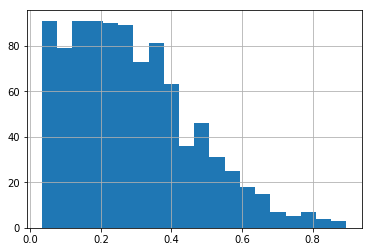

In [51]:
df['valence'].hist(bins=20)

> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [52]:
df['valence_clean'] = (df['valence']-df['valence'].min())/(df['valence'].max()-df['valence'].min())

## Visualization of cleaning

In [68]:
columns_for_processing = [x for x in list(df.columns) if 'clean' in x]
columns_for_processing.append('id')
df_clean = df[columns_for_processing].copy()
df_clean.rename(columns=lambda x: x.replace('_clean', ''), inplace=True)

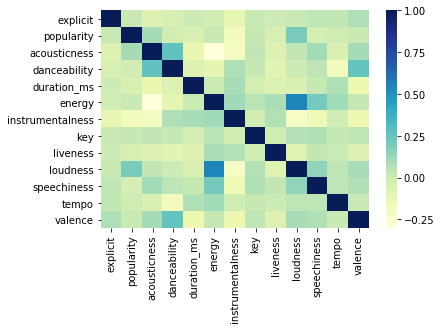

In [69]:
sns.heatmap(df_clean.corr(),cmap="YlGnBu")

Let's see this on a nice spider chart.

In [99]:
def plot_spider(df, categories, title=''):
    """Function to plot a spider/radar chart

    Args:
        df: The data frame to plot. Requires to be in th following format format:
            | feature1 | feature2 | ... | featureN |
          # | 0        | 1        | ... | -1       |
          Note: Only one row is allowed to the dataframe.
        categories: The categories, i.e. names of each feature.
        title: The title to be displayed over the plot. Default: ''

    Returns:
        Nothing (however, plots the radar chart directly)

    """
    # credits to: https://python-graph-gallery.com/390-basic-radar-chart/
    
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1'], color="grey", size=10)
    plt.ylim(0,1)
    
    # Plot title
    plt.title(title, size=20)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

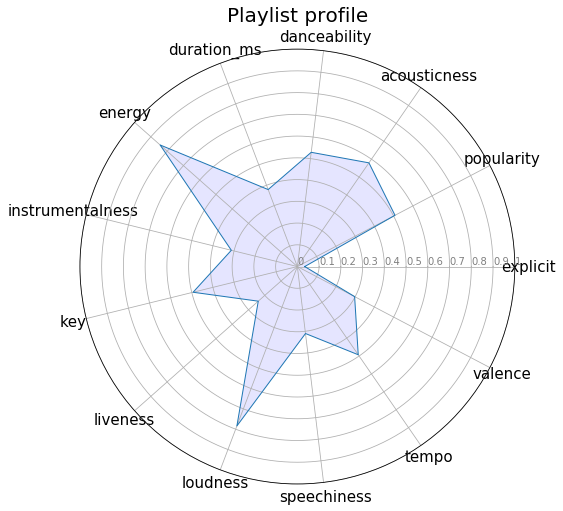

In [101]:
plot_spider(df_clean[[x for x in df_clean.columns if 'id' not in x]].mean(), [x for x in df_clean.columns if 'id' not in x], 'Playlist profile')

This spider chart, gives a good idea of the playlist.
Let's see if we can find clusters or principal components inside the data to group the tracks inside that playlist. We should then get more "extreme" profiles.

## Playlist analysis

In [102]:
#TBD